In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import re
import warnings
import seaborn as sns
import itertools
warnings.filterwarnings("ignore")
plt.rcParams['font.sans-serif']='SimHei'
plt.rcParams['axes.unicode_minus']=False

# 一、合并数据
## 获取每个房间的设备信息
- 只分析洗衣机、洗碗机、微波炉、电烤箱、电暖气、电炉、空调、空气处理装置

In [2]:
root=os.path.abspath("low_freq.csv")
users=os.listdir(root)
io = pd.io.excel.ExcelFile("新redd设备信息.xlsx")
#获取每个房间的设备型号,key为房间号，value为设备名称、设备号的dataframe
devices_df={}
for i in range(1,7):
    device=pd.read_excel(io, sheetname='房间'+str(i))
    device=device[device["设备名称"].str.contains("洗衣机|洗碗机|微波炉|电烤箱|电暖气|电炉|空调|空气处理装置")]
    name="building"+str(i)
    devices_df[name]=device
io.close()
print('devices_df["building1"]示例数据结构如下:')
devices_df["building1"]

devices_df["building1"]示例数据结构如下:


,设备号,设备名称,家电开启功率阈值/W,家电关闭功率阈值/W,开启的最短运行时间/s,关闭的最短运行时间/s
2,3,电烤箱,10.0,10.0,30.0,30.0
3,4,电烤箱,10.0,10.0,30.0,30.0
5,6,洗碗机,10.0,10.0,160.0,60.0
9,10,洗衣机,10.0,10.0,300.0,300.0
10,11,微波炉,10.0,10.0,15.0,30.0
13,14,电炉,10.0,10.0,30.0,30.0
19,20,洗衣机,10.0,10.0,300.0,300.0


## 合并所有表格。并在原有基础上添加三列：
- 所属用户user
- 设备类型dev_type
- 开关状态 status

In [3]:
all_df=[]
for user in users:
    print("\n==========正在合并%s的信息========="%user)
    excels=os.path.join(root,os.path.join(user,"elec"))
    file_path=os.path.join(root,excels)
    for file in os.listdir(file_path):
        #匹配文件名的数字，判断是否是我们需要分析的电器
        the_type=int(re.findall("meter(.*).csv",file)[0])
        if the_type not in list(devices_df[user]["设备号"]) or the_type==2:
            continue
        print(file,"正在合并meter",the_type)
        #当前用户的家电使用情况信息
        excel=os.path.join(file_path,file)
        df=pd.read_csv(excel)[1:]
        length=len(df)
  
        #新增user列
        df["user"]=[user]*length
        #获取设备号对应的设备名称
        #当不存在该电器时，跳过
        try:
            df["dev_type"]=[devices_df[user].loc[devices_df[user]["设备号"]==the_type,"设备名称"].values[0]]*length
            #新增status列1为运行状态，0为非运行状态
            start_power=devices_df[user].loc[devices_df[user]["设备号"]==the_type,"家电开启功率阈值/W"].values[0]
            df['status']=df['power'].apply(lambda x :1 if float(x)>10  else 0)
            #最短开启时间 开启的最短运行时间/s
            df['open_time']=[devices_df[user].loc[devices_df[user]["设备号"]==the_type,"开启的最短运行时间/s"].values[0]]*length
            #最短关闭时间 关闭的最短运行时间/s
            df['shut_time']=[devices_df[user].loc[devices_df[user]["设备号"]==the_type,"关闭的最短运行时间/s"].values[0]]*length
            all_df.append(df)
        except:
            continue
        
print("合并所有building的信息...")
data=pd.concat(all_df)
data.head()


==========正在合并building1的信息=========
meter10.csv 正在合并meter 10
meter11.csv 正在合并meter 11
meter14.csv 正在合并meter 14
meter20.csv 正在合并meter 20
meter3.csv 正在合并meter 3
meter4.csv 正在合并meter 4
meter6.csv 正在合并meter 6

==========正在合并building2的信息=========
meter10.csv 正在合并meter 10
meter5.csv 正在合并meter 5
meter6.csv 正在合并meter 6
meter7.csv 正在合并meter 7

==========正在合并building3的信息=========
meter10.csv 正在合并meter 10
meter13.csv 正在合并meter 13
meter14.csv 正在合并meter 14
meter16.csv 正在合并meter 16
meter9.csv 正在合并meter 9

==========正在合并building4的信息=========
meter10.csv 正在合并meter 10
meter15.csv 正在合并meter 15
meter20.csv 正在合并meter 20
meter4.csv 正在合并meter 4
meter7.csv 正在合并meter 7
meter8.csv 正在合并meter 8
meter9.csv 正在合并meter 9

==========正在合并building5的信息=========
meter12.csv 正在合并meter 12
meter13.csv 正在合并meter 13
meter20.csv 正在合并meter 20
meter3.csv 正在合并meter 3
meter6.csv 正在合并meter 6
meter8.csv 正在合并meter 8
meter9.csv 正在合并meter 9

==========正在合并building6的信息=========
meter12.csv 正在合并meter 12
meter15.csv 正在合并meter 15
meter16.

,physical_quantity,power,user,dev_type,status,open_time,shut_time
1,2011-04-18 09:22:13-04:00,0.0,building1,洗衣机,0,300.0,300.0
2,2011-04-18 09:22:16-04:00,0.0,building1,洗衣机,0,300.0,300.0
3,2011-04-18 09:22:20-04:00,0.0,building1,洗衣机,0,300.0,300.0
4,2011-04-18 09:22:23-04:00,0.0,building1,洗衣机,0,300.0,300.0
5,2011-04-18 09:22:26-04:00,0.0,building1,洗衣机,0,300.0,300.0


# 二、数据清洗
1、physical_quantity重命名为time      
2、由于time列的都以**04:00**结尾，由此去掉这一部分，并将该列转换为时间序列   
3、将time时间序列设置为索引列

In [4]:
data.rename(columns={"physical_quantity":"time"},inplace=True)
data.time=data.time.str.replace("-04:00","")
data.time=pd.to_datetime(data.time)
data=data.set_index("time")
data.head()

,power,user,dev_type,status,open_time,shut_time
time,,,,,,
2011-04-18 09:22:13,0.0,building1,洗衣机,0,300.0,300.0
2011-04-18 09:22:16,0.0,building1,洗衣机,0,300.0,300.0
2011-04-18 09:22:20,0.0,building1,洗衣机,0,300.0,300.0
2011-04-18 09:22:23,0.0,building1,洗衣机,0,300.0,300.0
2011-04-18 09:22:26,0.0,building1,洗衣机,0,300.0,300.0


### 查看数据

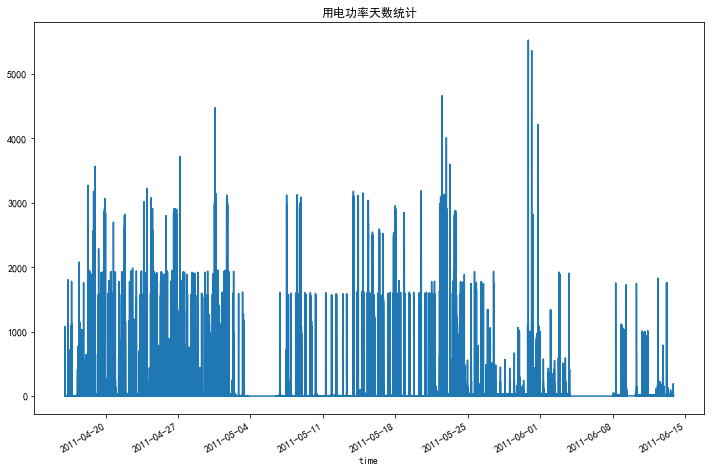

In [5]:
data['power'].astype('float').plot(figsize=(12,8),title="用电功率天数统计")


## 开关状态判断
 - 对于读取的状态数据（1为运行，0为关闭），将数据与最小开启/关闭时间作判断，更正误判状态
 - 将状态值进行差分，差分结果0为运行，非0值统计为1，代表一次开关状态


In [6]:
def judge_status(data):
    count=0
    last=0
    for k,v in itertools.groupby(data['status']):
        #连续相等值长度
        sequence=len(list(v))

        #获取该段数据
        temp=data.iloc[last:count,]
        if len(temp)==0:
            continue
        delta=(temp.index[-1]-temp.index[0]).seconds
        #判断当前开关状态
        if k==1:
            #如果开状态小于设定值，修改这部分状态为关闭
            if delta<temp['open_time'][0]:
                data[count:sequence:,]=0
        elif k==0:
             if delta<temp['shut_time'][0]:
                data[count:sequence:,]=1
        count+=sequence
    data['diff']=data['status'].diff().fillna(0)
    data['diff']=data['diff'].apply(lambda x:1 if x!=0 else 0 )

## 三、用电时间段频率统计
- 将所有用户时间汇总，获取每个小时的数据，开关次数（记录条数）
- 汇总7张表（对应6个用户以及总表，每张表24条数据对应24个小时。）

In [40]:
result=[]
electrical=data.dev_type.unique()
for user in users:
    for e in electrical:
        print("\r正在计算{}:{}".format(user,e),end=" ")
        #按半小时聚合
        half_data=data[(data["user"]==user) & (data["dev_type"]==e)]
        #如果不存在，就跳过
        if len(half_data)==0:
            continue
        judge_status(half_data)
        hour_agg=half_data.resample("0.5H").sum()

        user_names=[]
        switches=[]
        hours=[]
        types=[]
        for hour in range(48):
            h=int(hour/2)
            m=(hour%2*30)
            temp=hour_agg[(hour_agg.index.hour==h) & (hour_agg.index.minute==m)]
            switch=temp['diff'].sum()
            switches.append(switch)
            types.append(e)
            user_names.append(user)
            hours.append(hour)
        add_df=pd.DataFrame({
            "switch":switches,
            "user":user_names,
            "dev_type":types,
            "hours":hours
        })
        result.append(add_df)
print("\n计算完成！")

正在计算building6:空气处理装置 
计算完成！


(0, 48)

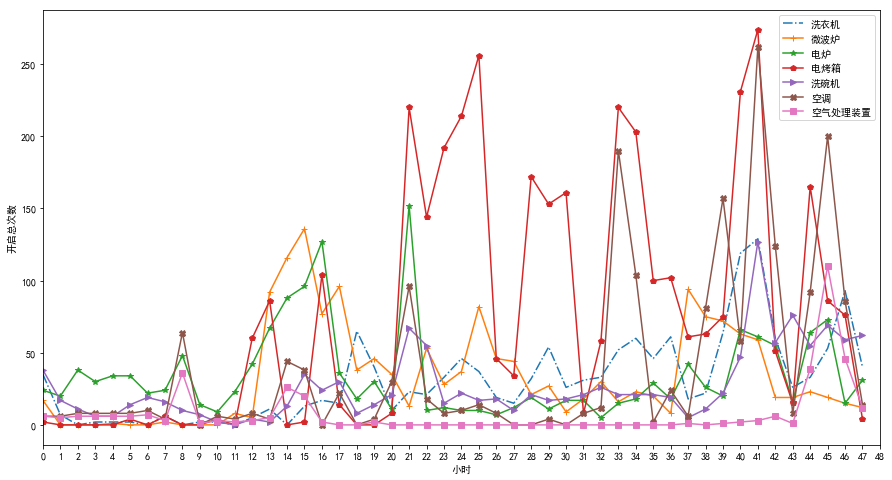

In [46]:
res=pd.concat(result)
res.to_csv("result.csv",index=None)
plt.figure(figsize=(15,8))
#根据类型和小时聚合
total=res.groupby(["dev_type","hours"]).sum()
# '''柱状图'''
# for e in electrical:
#     temp=total.loc[(e)]
#     plt.bar(temp.index,temp.switch,label=e)
#     plt.ylabel("开启总次数")
#     plt.xlabel("小时")
#     plt.legend()

'''折线图'''
marker=['-.','+-','*-','p-','>-','X-','s-']
for e,m in zip(electrical,marker):
    temp=total.loc[(e)]
    plt.plot(temp.index,temp.switch,m,label=e)
    x_major_locator=plt.MultipleLocator(1)
    ax=plt.gca()
    #ax为两条坐标轴的实例
    ax.xaxis.set_major_locator(x_major_locator)
    plt.ylabel("开启总次数")
    plt.xlabel("小时")
    plt.legend()
plt.xlim(0,48)

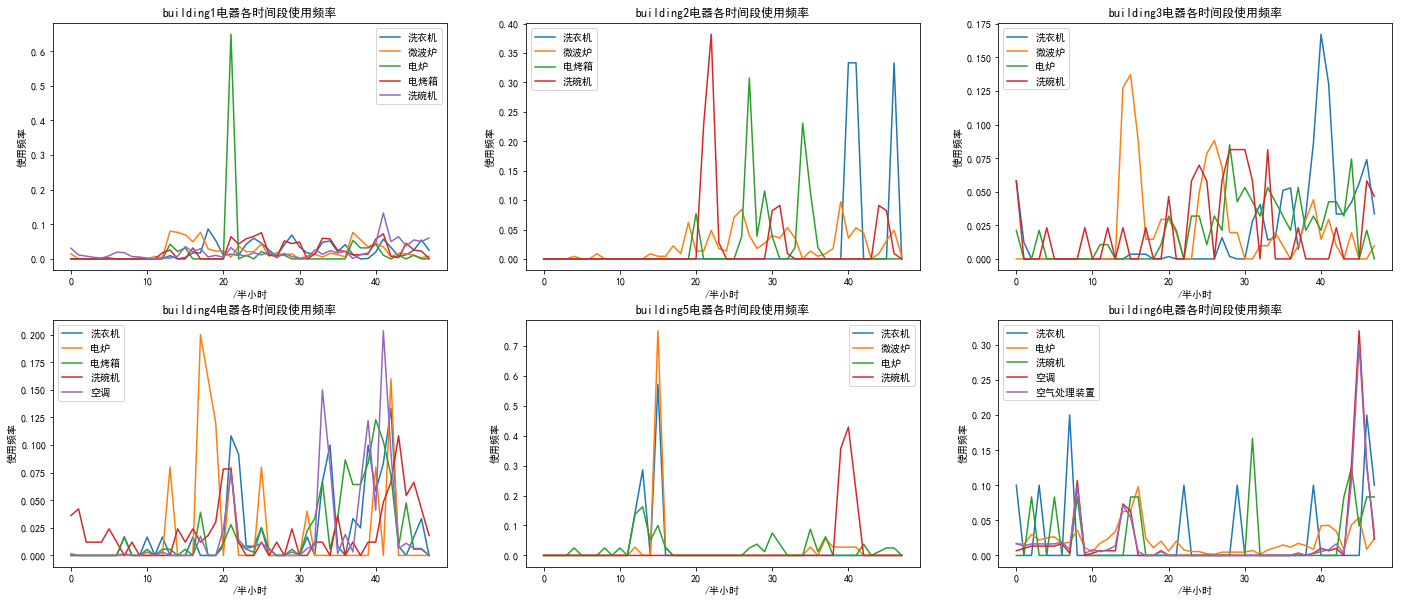

In [43]:
user_df=res[res["dev_type"]!="总"]
users=list(user_df.user.unique())
frequency=[]
plt.figure(figsize=(24,10))
count=1
#遍历6个用户,每个用户绘制一张子图
for user in users:
    temp=user_df[user_df["user"]==user]
    plt.subplot(2,3,count)
    #遍历该用户的各个电器，用于绘制曲线
    for d in list(temp.dev_type.unique()):
        dev=temp[temp["dev_type"]==d]
        total=dev['switch'].sum()#该电器在所有时段的开启次
        if total!=0:
            dev['switch']/=total
        plt.plot(dev.hours,dev.switch,label=d)
            
    plt.title("{}电器各时间段使用频率".format(user))
    plt.legend()
    plt.xlabel("/半小时")
    plt.ylabel("使用频率")
    count+=1
    